<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [476]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [477]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [478]:
data = pd.read_csv('/content/drive/My Drive/Dataset/M_BAJAS.txt',delimiter='~')
data.Fecha = pd.to_datetime(data.FECHA_BAJA)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [479]:
data.head(5)

,ANIO_BAJA,MES_BAJA,FECHA_BAJA,ANTIGUEDAD,CANT
0,2019,11,01/11/2019,1068,3
1,2020,4,01/04/2020,860,1
2,2019,11,05/11/2019,1673,1
3,2020,2,01/02/2020,1419,1
4,2019,8,01/08/2019,782,1


In [480]:
encabezados= ['Año','Mes','Fecha','Antiguedad','Cant_Bajas']
data.columns=encabezados

In [481]:
data.head(5)

,Año,Mes,Fecha,Antiguedad,Cant_Bajas
0,2019,11,01/11/2019,1068,3
1,2020,4,01/04/2020,860,1
2,2019,11,05/11/2019,1673,1
3,2020,2,01/02/2020,1419,1
4,2019,8,01/08/2019,782,1


In [482]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

Año           0
Mes           0
Fecha         0
Antiguedad    0
Cant_Bajas    0
dtype: int64


In [483]:
data.describe(include='all')

,Año,Mes,Fecha,Antiguedad,Cant_Bajas
count,17101.000000,17101.000000,17101,17101.000000,17101.000000
unique,NaN,NaN,315,NaN,NaN
top,NaN,NaN,01/02/2020,NaN,NaN
freq,NaN,NaN,848,NaN,NaN
mean,2019.358459,5.469797,NaN,902.821531,1.561312
std,0.479562,3.262741,NaN,493.846888,1.115205
min,2019.000000,1.000000,NaN,0.000000,1.000000
25%,2019.000000,3.000000,NaN,489.000000,1.000000
50%,2019.000000,5.000000,NaN,847.000000,1.000000
75%,2020.000000,7.000000,NaN,1289.000000,2.000000


In [484]:
data.info 

<bound method DataFrame.info of         Año  Mes       Fecha  Antiguedad  Cant_Bajas
0      2019   11  01/11/2019        1068           3
1      2020    4  01/04/2020         860           1
2      2019   11  05/11/2019        1673           1
3      2020    2  01/02/2020        1419           1
4      2019    8  01/08/2019         782           1
...     ...  ...         ...         ...         ...
17096  2019    8  01/08/2019        1029           1
17097  2019    4  01/04/2019         191           1
17098  2019   11  01/11/2019         686           1
17099  2020    7  01/07/2020        1037           1
17100  2019    3  23/03/2019         703           1

[17101 rows x 5 columns]>

In [485]:
#Agrupamos la columna antiguedad
#1 : 1 TRIMESTRE (0-93 DIAS)
#2 : 2 TRIMESTRE (94-186 DIAS)
#3 : 3 TRIMESTRE (187-279 DIAS)
#4 : 4 TRIMESTRE (280-370 DIAS)
#5 : A 2 AÑOS (371-725 DIAS) 
#6 : A 3 AÑOS (726-1095 DIAS)
#7 : 4 años en adelante (Máximo DIAS 7276) 
bins=[0,93,186,279,370,725,1095,7276]
names=['1','2','3','4','5','6','7']
data['Antiguedad'] = pd.cut(data['Antiguedad'],bins,labels=names)

In [486]:
data.head(5)

,Año,Mes,Fecha,Antiguedad,Cant_Bajas
0,2019,11,01/11/2019,6,3
1,2020,4,01/04/2020,6,1
2,2019,11,05/11/2019,7,1
3,2020,2,01/02/2020,7,1
4,2019,8,01/08/2019,6,1


In [487]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

Año           0
Mes           0
Fecha         0
Antiguedad    1
Cant_Bajas    0
dtype: int64


In [488]:
data.dropna(subset = ['Antiguedad'] , axis=0, inplace=True)

In [489]:
grupo = data.groupby(by = ['Año','Mes','Antiguedad']).sum()
grupo= pd.DataFrame(grupo).reset_index()

In [490]:
grupo.head(5)

,Año,Mes,Antiguedad,Cant_Bajas
0,2019,1,1,29.0
1,2019,1,2,28.0
2,2019,1,3,35.0
3,2019,1,4,125.0
4,2019,1,5,587.0


In [491]:
grupo.dtypes

Año              int64
Mes              int64
Antiguedad    category
Cant_Bajas     float64
dtype: object

In [492]:
 #validamos datos faltantes
 print(pd.isnull(grupo).sum())

Año            0
Mes            0
Antiguedad     0
Cant_Bajas    35
dtype: int64


In [493]:
grupo.dropna(subset = ['Cant_Bajas'] , axis=0, inplace=True)

In [494]:
grupo.head(5)

,Año,Mes,Antiguedad,Cant_Bajas
0,2019,1,1,29.0
1,2019,1,2,28.0
2,2019,1,3,35.0
3,2019,1,4,125.0
4,2019,1,5,587.0


In [495]:
x= grupo.iloc[:,:-1].values
x=np.array(x)
y= grupo.iloc[:,3].values
y = y[:,np.newaxis]

In [496]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder= LabelEncoder()
x[:,2] = labelencoder.fit_transform(x[:,2])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[2])],remainder='passthrough')
x=np.array(ct.fit_transform(x),dtype=np.int)

In [511]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [512]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

In [513]:
from sklearn.linear_model import LinearRegression
lineal_poly = LinearRegression()
lineal_poly.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [514]:
print("precisión del modelo regresión polinomial")
lineal_poly.score(x_poly,y_train)

precisión del modelo regresión polinomial


0.8812301023447452

In [515]:
y_predic = lineal_poly.predict(x_poly_test)

ValueError: ignored

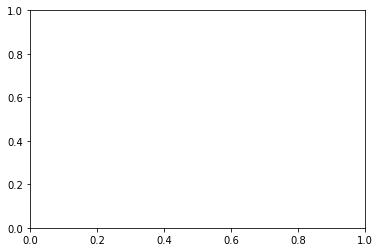

In [517]:
#Gráfica
plt.scatter(x_test,y_test)
#plt.plot(x_test,y_predic,color='red',linewidth=3)
plt.show()

In [441]:
x_test.size

243

In [442]:
y_test.size

27

In [443]:
y_predic.size

27

In [444]:
x_poly_test.size

5940